# import

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/daigt-proper-train-dataset/train_drcat_03.csv
/kaggle/input/daigt-proper-train-dataset/train_drcat_02.csv
/kaggle/input/daigt-proper-train-dataset/train_drcat_04.csv
/kaggle/input/daigt-proper-train-dataset/train_drcat_01.csv
/kaggle/input/llm-detect-ai-generated-text/sample_submission.csv
/kaggle/input/llm-detect-ai-generated-text/train_prompts.csv
/kaggle/input/llm-detect-ai-generated-text/test_essays.csv
/kaggle/input/llm-detect-ai-generated-text/train_essays.csv


In [2]:
! pip install -q squarify

In [3]:
import matplotlib.pyplot as plt
import squarify

In [4]:
org_train = pd.read_csv("/kaggle/input/llm-detect-ai-generated-text/train_essays.csv")
new_train = pd.read_csv("/kaggle/input/daigt-proper-train-dataset/train_drcat_02.csv")
test_candidate = pd.read_csv("/kaggle/input/daigt-proper-train-dataset/train_drcat_04.csv")

# EDA : org_train

In [5]:
org_train

,id,prompt_id,text,generated
0,0059830c,0,Cars. Cars have been around since they became ...,0
1,005db917,0,Transportation is a large necessity in most co...,0
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0
3,00940276,0,How often do you ride in a car? Do you drive a...,0
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0
...,...,...,...,...
1373,fe6ff9a5,1,There has been a fuss about the Elector Colleg...,0
1374,ff669174,0,Limiting car usage has many advantages. Such a...,0
1375,ffa247e0,0,There's a new trend that has been developing f...,0
1376,ffc237e9,0,As we all know cars are a big part of our soci...,0


In [6]:
org_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1378 entries, 0 to 1377
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         1378 non-null   object
 1   prompt_id  1378 non-null   int64 
 2   text       1378 non-null   object
 3   generated  1378 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 43.2+ KB


In [7]:
org_train["id"].nunique(), len(org_train)

(1378, 1378)

In [8]:
org_train.duplicated('text').sum()

0

generated
0    1375
1       3
Name: count, dtype: int64


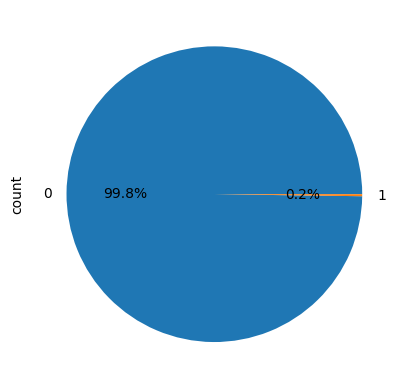

In [9]:
generated_value_counts = org_train["generated"].value_counts()
print(generated_value_counts)
generated_value_counts.plot.pie(autopct='%1.1f%%');

# EDA : new_train

In [10]:
new_train

,essay_id,text,label,source,prompt,fold
0,E0B86027C5C5,"Okay, here is my essay:\n\nWorking or doing th...",1,llama2_chat,Task: \n\n1. Research the benefits of working ...,1
1,8B9EEF86DD66,"Dear Principal,\r\n\r\nI just want to let you ...",0,original_moth,Task: Research the effects of implementing a p...,2
2,116FB053BEC7,I believe they should change the voting to pop...,0,persuade_corpus,NaN,9
3,A72A4397F9F5,One example of an inspiring individual who has...,1,chat_gpt_moth,Task: Analyze examples of inspiring people who...,0
4,D90A159EDD27,"Dear Mr. Principal,\n\nI believe that students...",0,persuade_corpus,NaN,5
...,...,...,...,...,...,...
39780,F7341069C4A4,"""Oh man I didn't make the soccer team!"", yelle...",0,persuade_corpus,NaN,4
39781,AFE6E553DAC2,I believe that using this technology could be ...,0,persuade_corpus,NaN,2
39782,falcon_180b_v1_600,The Face on Mars is a fascinating phenomenon t...,1,falcon_180b_v1,You have read the article 'Unmasking the Face ...,2
39783,A5F84C104693,Texting & Driving\n\nUsing your phone while dr...,0,persuade_corpus,NaN,2


In [11]:
new_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39785 entries, 0 to 39784
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   essay_id  39785 non-null  object
 1   text      39785 non-null  object
 2   label     39785 non-null  int64 
 3   source    39785 non-null  object
 4   prompt    9490 non-null   object
 5   fold      39785 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 1.8+ MB


In [12]:
new_train.isna().sum()

essay_id        0
text            0
label           0
source          0
prompt      30295
fold            0
dtype: int64

label
0    29792
1     9993
Name: count, dtype: int64


<Axes: ylabel='count'>

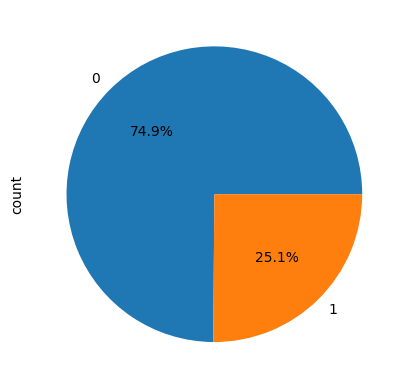

In [13]:
label_value_counts = new_train["label"].value_counts()
print(label_value_counts)
label_value_counts.plot.pie(autopct='%1.1f%%')

In [14]:
new_train.duplicated('text').sum()

51

In [15]:
new_train.drop_duplicates('text', inplace=True)
new_train

,essay_id,text,label,source,prompt,fold
0,E0B86027C5C5,"Okay, here is my essay:\n\nWorking or doing th...",1,llama2_chat,Task: \n\n1. Research the benefits of working ...,1
1,8B9EEF86DD66,"Dear Principal,\r\n\r\nI just want to let you ...",0,original_moth,Task: Research the effects of implementing a p...,2
2,116FB053BEC7,I believe they should change the voting to pop...,0,persuade_corpus,NaN,9
3,A72A4397F9F5,One example of an inspiring individual who has...,1,chat_gpt_moth,Task: Analyze examples of inspiring people who...,0
4,D90A159EDD27,"Dear Mr. Principal,\n\nI believe that students...",0,persuade_corpus,NaN,5
...,...,...,...,...,...,...
39780,F7341069C4A4,"""Oh man I didn't make the soccer team!"", yelle...",0,persuade_corpus,NaN,4
39781,AFE6E553DAC2,I believe that using this technology could be ...,0,persuade_corpus,NaN,2
39782,falcon_180b_v1_600,The Face on Mars is a fascinating phenomenon t...,1,falcon_180b_v1,You have read the article 'Unmasking the Face ...,2
39783,A5F84C104693,Texting & Driving\n\nUsing your phone while dr...,0,persuade_corpus,NaN,2


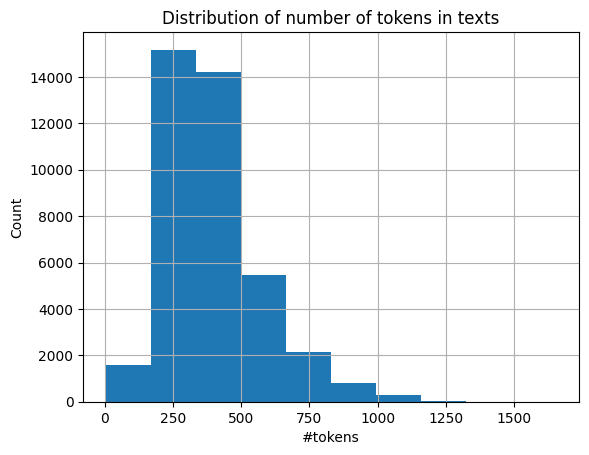

In [16]:
new_train["text"].map(lambda x: len(x.strip().split())).hist()
plt.xlabel("#tokens")
plt.ylabel("Count")
plt.title("Distribution of number of tokens in texts");

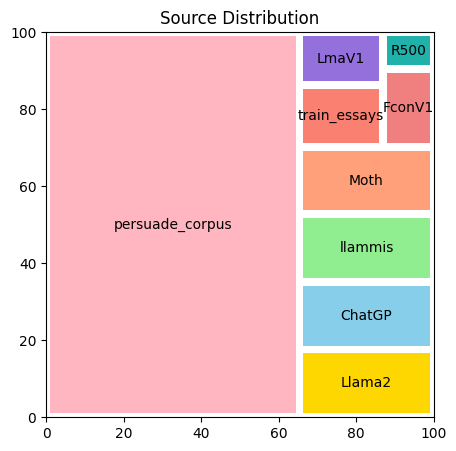

In [17]:
source_value_counts = new_train["source"].value_counts()
values = source_value_counts.values
short_labels = ['persuade_corpus', 'Llama2', 'ChatGP', 'llammis', 'Moth', 'train_essays', 'LmaV1', 'FconV1', 'R500']
pastel_colors = ['#FFB6C1', '#FFD700', '#87CEEB', '#90EE90', '#FFA07A', '#FA8072', '#9370DB', '#F08080', '#20B2AA']

fig, ax = plt.subplots(figsize=(5, 5))

squarify.plot(sizes=values, label=short_labels, color=pastel_colors, pad=True)
plt.title("Source Distribution");

In [18]:
redundant_essay_id_indicies = new_train.duplicated('essay_id', keep=False)
redundant_essay_id_indicies.sum()

9887

In [19]:
new_train.loc[redundant_essay_id_indicies].groupby('essay_id')["label"].value_counts()

essay_id      label
6060D28C05B6  1        3
              0        1
60623DB5DE7A  1        3
              0        1
607A39D981DE  1        3
                      ..
F610B3CBF3DF  0        1
F610C7BCD9EC  1        3
              0        2
F6194DEBEFA7  1        3
              0        1
Name: count, Length: 4842, dtype: int64

In [20]:
new_train.loc[redundant_essay_id_indicies].groupby('essay_id')["text"].nunique()

essay_id
6060D28C05B6    4
60623DB5DE7A    4
607A39D981DE    4
60ACDFA1609E    4
60AE13D3F07B    4
               ..
F5FF5E9E553C    4
F60545D8271E    4
F610B3CBF3DF    4
F610C7BCD9EC    5
F6194DEBEFA7    4
Name: text, Length: 2421, dtype: int64

# preprocessing : Data Augmentation

In [21]:
org_train = org_train[["text", "generated"]]
org_train

,text,generated
0,Cars. Cars have been around since they became ...,0
1,Transportation is a large necessity in most co...,0
2,"""America's love affair with it's vehicles seem...",0
3,How often do you ride in a car? Do you drive a...,0
4,Cars are a wonderful thing. They are perhaps o...,0
...,...,...
1373,There has been a fuss about the Elector Colleg...,0
1374,Limiting car usage has many advantages. Such a...,0
1375,There's a new trend that has been developing f...,0
1376,As we all know cars are a big part of our soci...,0


In [22]:
positive = new_train.loc[new_train['label'] == 1][["text", "label"]]
positive = positive.rename(columns={"text": "text", "label": "generated"})
positive

,text,generated
0,"Okay, here is my essay:\n\nWorking or doing th...",1
3,One example of an inspiring individual who has...,1
6,"""As a high school student, I have witnessed th...",1
11,Video games have been a popular form of entert...,1
13,Group work is an essential part of life; it ca...,1
...,...,...
39767,Sure thing! Here's my attempt at writing an es...,1
39770,I think our principal's idea of making us do e...,1
39771,I think it's a good idea for schools to have o...,1
39778,Advantages of Limiting Car Usage\n\nLimiting c...,1


In [23]:
negative = new_train.loc[new_train['label'] == 0][["text", "label"]]
negative = negative.rename(columns={"text": "text", "label": "generated"})
negative

,text,generated
1,"Dear Principal,\r\n\r\nI just want to let you ...",0
2,I believe they should change the voting to pop...,0
4,"Dear Mr. Principal,\n\nI believe that students...",0
5,I think that this image of this face is very n...,0
7,"Dear Principle,\n\nI sincerely hope you will n...",0
...,...,...
39779,Are driverless cars really necessary? Most of ...,0
39780,"""Oh man I didn't make the soccer team!"", yelle...",0
39781,I believe that using this technology could be ...,0
39783,Texting & Driving\n\nUsing your phone while dr...,0


In [24]:
text_overlap_of_positive = positive["text"].isin(org_train["text"])
text_overlap_of_positive.sum()

3

In [25]:
positive = positive[~text_overlap_of_positive]
positive.shape

(9990, 2)

In [26]:
text_overlap_of_negative = negative["text"].isin(org_train["text"])
text_overlap_of_negative.sum()

1375

In [27]:
negative = negative[~text_overlap_of_negative]
negative.shape

(28366, 2)

In [28]:
org_train['generated'].value_counts(), positive['generated'].value_counts(), negative['generated'].value_counts()

(generated
 0    1375
 1       3
 Name: count, dtype: int64,
 generated
 1    9990
 Name: count, dtype: int64,
 generated
 0    28366
 Name: count, dtype: int64)

In [29]:
9993-1375

8618

In [30]:
data = pd.concat([org_train, positive, negative.sample(8618)])
data = data.sample(frac=1).reset_index(drop=True)
data

,text,generated
0,Introduction:\n\nHey everyone! I just read thi...,1
1,"Hey there! \n\nSo, you know how people always ...",1
2,I think that students would not benefit from t...,0
3,"""Making Mona Lisa Smile"" is an article that ta...",1
4,The question of whether or not we have to live...,1
...,...,...
19981,"Dear,Pricipal please do not change the school ...",0
19982,"Hey there! So, Mr. Jefferson was totally righ...",1
19983,"Hey there! So, you want me to write an essay ...",1
19984,"Hey, I'm just an average 8th grader, but I'm g...",1


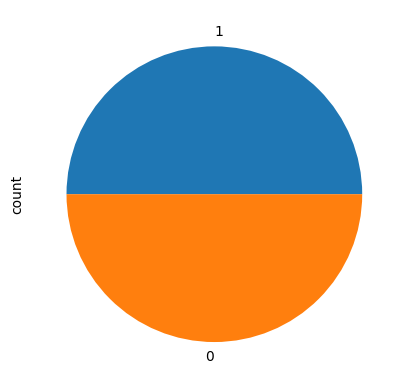

In [31]:
data['generated'].value_counts().plot.pie();

In [32]:
X, y = data["text"], data["generated"]

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, stratify=y)

In [34]:
X_train = X_train.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_val = y_val.reset_index(drop=True)

In [35]:
test_candidate = test_candidate.drop_duplicates('text')
test_candidate = test_candidate[["text", "label"]]
test_candidate = test_candidate.rename(columns={'text':'text', 'label':"generated"})
test_candidate = test_candidate.reset_index(drop=True)
test_candidate

,text,generated
0,"In recent years, technology has had a profoun...",1
1,Should students participate in an extracurricu...,0
2,The electoral college is a symbol of mockery a...,0
3,This is why I think the principle should allow...,0
4,I strongly believe that meditation and mindful...,1
...,...,...
44150,"""Oh man I didn't make the soccer team!"", yelle...",0
44151,I believe that using this technology could be ...,0
44152,The Face on Mars is a fascinating phenomenon t...,1
44153,Texting & Driving\n\nUsing your phone while dr...,0


In [36]:
X_test, y_test = test_candidate['text'], test_candidate['generated']
X_test.shape, y_test.shape

((44155,), (44155,))

# training models : binary text classification

## bidirection LSTM

In [37]:
from collections import Counter

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

from tqdm import tqdm

from sklearn.metrics import f1_score, classification_report, roc_curve, auc

In [38]:
from torchtext.data.utils import get_tokenizer
class Vocabulary:
    def __init__(self, freq_threshold, max_size):
        """
        Initialize Vocabulary object.
        
        Args:
        - freq_threshold (int): Minimum frequency threshold for a word to be included in the vocabulary.
        - max_size (int): Maximum size of the vocabulary.
        """
        self.itos = {0: '<PAD>', 1: '<SOS>', 2: '<EOS>', 3: '<UNK>'}
        self.stoi = {k: j for j, k in self.itos.items()}
        self.freq_threshold = freq_threshold
        self.max_size = max_size
        self.tokenizer = get_tokenizer("basic_english")

    def __len__(self):
        """
        Get the length of the vocabulary.
        """
        return len(self.itos)


    def build_vocabulary(self, sentence_list):
        """
        Build the vocabulary based on the input list of sentences.
        
        Args:
        - sentence_list (list of str): List of sentences to build vocabulary from.
        """
        frequencies = Counter()
        for sentence in sentence_list:
            frequencies.update(self.tokenizer(sentence))

        frequencies = {k: v for k, v in frequencies.items() if v > self.freq_threshold}
        
        frequencies = dict(sorted(frequencies.items(), key=lambda x: -x[1])[:self.max_size - 4])

        idx = 4
        for word in frequencies:
            self.stoi[word] = idx
            self.itos[idx] = word
            idx += 1
            
    def get_vocabularies(self):
        """
        Get vocabularies.
        
        Returns:
        - tuple: Dictionaries itos.
        """
        return self.itos

    def numericalize(self, text):
        """
        Convert input text into a sequence of numerical indices based on the vocabulary.
        
        Args:
        - text (str): Input text to convert into numerical representation.
        
        Returns:
        - list of int: List of numerical indices representing the input text.
        """
        tokenized_text = self.tokenizer(text)
        numericalized_text = [self.stoi.get(token, self.stoi['<UNK>']) for token in tokenized_text]
        return numericalized_text

In [39]:
class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [40]:
def collate_batch(batch, vocab):
    """
    Collates a batch of samples into padded sequences of text and labels.

    Args:
        batch (list): A list of samples, where each sample is a dictionary containing 'text' and 'label' keys.
        vocab (torchtext.vocab.Vocab): The vocabulary object used to numericalize text.

    Returns:
        tuple: A tuple containing three elements:
            - padded_text (torch.Tensor): Padded sequences of numericalized text.
            - label_list (torch.Tensor): Tensor containing labels for each sample.
            - lengths (torch.Tensor): Tensor containing lengths of sequences in the batch.
    """
    text_list, label_list, lengths = [], [], []
    for _text, _label in batch:
        
        processed_text = torch.tensor(vocab.numericalize(_text), dtype=torch.int64)
        
        text_list.append(processed_text)
        label_list.append(float(_label))
        lengths.append(len(processed_text))
    
    padded_text = torch.nn.utils.rnn.pad_sequence(text_list, batch_first=True, padding_value=vocab.stoi['<PAD>'])
    
    return padded_text, torch.tensor(label_list), torch.tensor(lengths)

In [41]:
class RNN(nn.Module):
    """
    A recurrent neural network (RNN) model for sequence classification.

    Args:
        vocab_size (int): The size of the vocabulary.
        embed_dim (int): The dimensionality of the embedding layer.
        rnn_hidden_dim (int): The number of features in the RNN hidden state.
        fc_dim (int): The dimensionality of the fully connected layer.
        bidirectional (bool, optional): If True, use a bidirectional RNN. Default is True.
        num_layers (int, optional): Number of recurrent layers. Default is 2.
        dropout (float, optional): Dropout probability. Default is 0.25.
    """

    def __init__(self, vocab_size, embed_dim, rnn_hidden_dim, first_fc_dim, second_fc_dim, third_fc_dim, bidirectional=True, num_layers=4, dropout=0.25):
        """
        Initializes the RNN model.

        Args:
            vocab_size (int): The size of the vocabulary.
            embed_dim (int): The dimensionality of the embedding layer.
            rnn_hidden_dim (int): The number of features in the RNN hidden state.
            fc_dim (int): The dimensionality of the fully connected layer.
            bidirectional (bool, optional): If True, use a bidirectional RNN. Default is True.
            num_layers (int, optional): Number of recurrent layers. Default is 2.
            dropout (float, optional): Dropout probability. Default is 0.25.
        """
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=0)
        self.rnn = nn.LSTM(embed_dim, rnn_hidden_dim, batch_first=True, bidirectional=bidirectional, num_layers=num_layers, dropout=dropout)
        self.fc1 = nn.Linear(rnn_hidden_dim * 2 if bidirectional else rnn_hidden_dim, first_fc_dim)
        self.fc2 = nn.Linear(first_fc_dim, second_fc_dim)
        self.fc3 = nn.Linear(second_fc_dim, third_fc_dim)
        self.fc4 = nn.Linear(third_fc_dim, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, text, lengths):
        """
        Performs forward pass of the RNN model.

        Args:
            text (torch.Tensor): Input sequences of token indices.
            lengths (torch.Tensor): Lengths of sequences in the batch.

        Returns:
            torch.Tensor: Output predictions (probabilities).
        """
        out = self.embedding(text)
        out = nn.utils.rnn.pack_padded_sequence(out, lengths.cpu().numpy(), enforce_sorted=False, batch_first=True)
        _, (hidden, cell) = self.rnn(out)
        out = torch.cat((hidden[-2, :, :], hidden[-1, :, :]), dim=1) if self.rnn.bidirectional else hidden[-1, :, :]
        out = self.fc1(out)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        out = self.relu(out)
        out = self.fc4(out)
        out = self.sigmoid(out)
        return out

In [42]:
def train(dataloader):
    """
    Trains the model using the given dataloader.

    Args:
        dataloader (torch.utils.data.DataLoader): The dataloader providing batches of data.

    Returns:
        tuple: A tuple containing three elements:
            - avg_acc (float): Average accuracy of the model on the training data.
            - avg_loss (float): Average loss of the model on the training data.
            - f1 (float): F1 score of the model on the training data.
    """
    model.train()
    total_acc, total_loss = 0, 0
    y_true, y_pred = [], []
    for text_batch, label_batch, lengths in dataloader:
        text_batch, label_batch, lengths = text_batch.to(device), label_batch.to(device), lengths.to(device)
        optimizer.zero_grad()
        pred = model(text_batch, lengths)[:, 0]
        loss = criterion(pred, label_batch)
        loss.backward()
        optimizer.step()
        total_acc += ((pred >= 0.5).float() == label_batch).float().sum().item()
        total_loss += loss.item() * label_batch.size(0)
        y_true.extend(label_batch.cpu().numpy())
        y_pred.extend((pred >= 0.5).cpu().numpy())
    
    # Learning rate scheduling after each epoch
    scheduler.step()
    
    avg_acc = total_acc / len(dataloader.dataset)
    avg_loss = total_loss / len(dataloader.dataset)
    f1 = f1_score(y_true, y_pred)
    return avg_acc, avg_loss, f1

In [43]:
def evaluate(dataloader):
    """
    Evaluates the model using the given dataloader.

    Args:
        dataloader (torch.utils.data.DataLoader): The dataloader providing batches of data.

    Returns:
        tuple: A tuple containing three elements:
            - avg_acc (float): Average accuracy of the model on the validation data.
            - avg_loss (float): Average loss of the model on the validation data.
            - f1 (float): F1 score of the model on the validation data.
    """
    model.eval()
    total_acc, total_loss = 0, 0
    y_true, y_pred, y_probs = [], [], []
    with torch.no_grad():
        for text_batch, label_batch, lengths in dataloader:
            text_batch, label_batch, lengths = text_batch.to(device), label_batch.to(device), lengths.to(device)
            pred = model(text_batch, lengths)[:, 0]
            loss = criterion(pred, label_batch)
            total_acc += ((pred >= 0.5).float() == label_batch).float().sum().item()
            total_loss += loss.item() * label_batch.size(0)
            y_true.extend(label_batch.cpu().numpy())
            y_pred.extend((pred >= 0.5).cpu().numpy())
            y_probs.extend(pred.cpu().numpy())
    avg_accuracy = total_acc / len(dataloader.dataset)
    average_loss = total_loss / len(dataloader.dataset)
    f1 = f1_score(y_true, y_pred)
    classification_report_result = classification_report(y_true, y_pred)
    
    return avg_accuracy, average_loss, f1, classification_report_result, y_probs 


In [44]:
torch.manual_seed(1)

In [45]:
vocab = Vocabulary(freq_threshold=5, max_size=10000)
vocab.build_vocabulary(X_train)

In [46]:
print(list(vocab.get_vocabularies().values())[:250])

['<PAD>', '<SOS>', '<EOS>', '<UNK>', '.', ',', 'the', 'to', 'and', 'a', 'of', 'in', 'that', 'it', 'is', "'", 'for', 'can', 'you', 'be', 'they', 'i', 'have', 'are', 'students', 'on', 'not', 'their', 'this', 's', 'with', 'or', 'we', 'people', 'more', 'as', 'if', 'like', 'school', 'would', 'but', 'will', 'do', 'because', 'by', 't', 'also', 'there', 'from', 'help', 'when', 'our', 'them', 'time', 'an', 'so', 'about', 'all', 'your', 'one', 'some', 'make', 'should', 'what', 'at', 'get', 'could', 'who', 'has', 'my', 'just', 'car', 'other', 'may', 'was', 'electoral', 'think', 'cars', 'college', 'work', 'how', 'many', 'student', 'up', 'way', 'good', 'out', 'even', 'which', '?', 'these', 'know', 'better', 'life', 'important', 'us', 'take', 'while', 'want', 'states', 'learning', 'vote', 'use', 'new', 'need', '!', 're', 'being', 'learn', 'don', 'than', 'example', 'own', 'something', 'only', 'might', 'why', 'things', 'able', 'most', 'day', 'having', 'then', 'classes', 'me', 'no', 'he', 'go', 'really

In [47]:
train_dataset = CustomDataset(X_train, y_train)
validation_dataset = CustomDataset(X_val, y_val)

In [48]:
batch_size = 64
train_dl = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=lambda batch: collate_batch(batch, vocab), drop_last=True)
valid_dl = DataLoader(validation_dataset, batch_size=batch_size, shuffle=False, collate_fn=lambda batch: collate_batch(batch, vocab))

In [49]:
test_batch_size = 32
test_dataset = CustomDataset(X_test, y_test)
test_dl = DataLoader(test_dataset, batch_size=test_batch_size, shuffle=False, collate_fn=lambda batch: collate_batch(batch, vocab))

In [50]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

vocab_size = len(vocab)  
embed_dim = 1024  
rnn_hidden_dim = 128
first_fc_dim =  128
second_fc_dim =  64
third_fc_dim =  8

model = RNN(vocab_size, embed_dim, rnn_hidden_dim, first_fc_dim, second_fc_dim, third_fc_dim).to(device)

print(model)

cuda
RNN(
  (embedding): Embedding(10000, 1024, padding_idx=0)
  (rnn): LSTM(1024, 128, num_layers=4, batch_first=True, dropout=0.25, bidirectional=True)
  (fc1): Linear(in_features=256, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=8, bias=True)
  (fc4): Linear(in_features=8, out_features=1, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
)


In [51]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=4, gamma=0.1)

In [52]:
num_epochs = 5
torch.manual_seed(1)

train_acc_list, train_loss_list = [], []
valid_acc_list, valid_loss_list = [], []
train_f1_score_list, valid_f1_score_list = [], []

for epoch in tqdm(range(num_epochs)):
    acc_train, loss_train, f1_score_train = train(train_dl)
    acc_valid, loss_valid, f1_score_valid, _, _ = evaluate(valid_dl)
    
    train_acc_list.append(acc_train)
    train_loss_list.append(loss_train)
    train_f1_score_list.append(f1_score_train)
    
    valid_acc_list.append(acc_valid)
    valid_loss_list.append(loss_valid)
    valid_f1_score_list.append(f1_score_valid)
    
    print(f'Epoch {epoch} *** acc_train: {acc_train:.4f} ****** acc_valid: {acc_valid:.4f}')
    print(f'Epoch {epoch} *** loss_train: {loss_train:.4f} ****** loss_valid: {loss_valid:.4f}')
    print(f'Epoch {epoch} *** f1_score_train: {f1_score_train:.4f} ****** f1_score_valid: {f1_score_valid:.4f}')        

 20%|██        | 1/5 [01:38<06:32, 98.22s/it]

Epoch 0 *** acc_train: 0.8859 ****** acc_valid: 0.9745
Epoch 0 *** loss_train: 0.3081 ****** loss_valid: 0.0787
Epoch 0 *** f1_score_train: 0.8910 ****** f1_score_valid: 0.9740


 40%|████      | 2/5 [03:15<04:53, 97.93s/it]

Epoch 1 *** acc_train: 0.9755 ****** acc_valid: 0.9847
Epoch 1 *** loss_train: 0.0719 ****** loss_valid: 0.0427
Epoch 1 *** f1_score_train: 0.9786 ****** f1_score_valid: 0.9849


 60%|██████    | 3/5 [04:52<03:15, 97.53s/it]

Epoch 2 *** acc_train: 0.9789 ****** acc_valid: 0.9607
Epoch 2 *** loss_train: 0.0527 ****** loss_valid: 0.1532
Epoch 2 *** f1_score_train: 0.9821 ****** f1_score_valid: 0.9621


 80%|████████  | 4/5 [06:30<01:37, 97.50s/it]

Epoch 3 *** acc_train: 0.9841 ****** acc_valid: 0.9752
Epoch 3 *** loss_train: 0.0392 ****** loss_valid: 0.0830
Epoch 3 *** f1_score_train: 0.9873 ****** f1_score_valid: 0.9756


100%|██████████| 5/5 [08:07<00:00, 97.55s/it]

Epoch 4 *** acc_train: 0.9896 ****** acc_valid: 0.9912
Epoch 4 *** loss_train: 0.0242 ****** loss_valid: 0.0306
Epoch 4 *** f1_score_train: 0.9928 ****** f1_score_valid: 0.9912


# evaluate

In [53]:
_, _, _, classification_result_report, y_probs = evaluate(test_dl)

In [54]:
print(classification_result_report)

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     29741
         1.0       0.98      0.98      0.98     14414

    accuracy                           0.99     44155
   macro avg       0.99      0.98      0.99     44155
weighted avg       0.99      0.99      0.99     44155



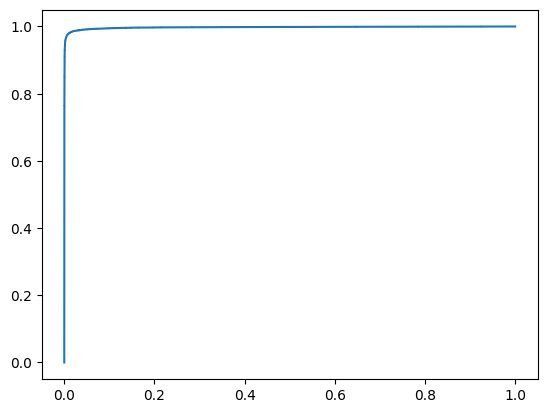

In [55]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr);

In [56]:
torch.save(model, 'model.pth')